In [128]:
#import
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
os.sys.path.append('../')
from utilities import *

from astropy.convolution import convolve, Gaussian1DKernel

import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
mouse = '4139190.3'

In [32]:
# check behavior data
df = load_session_db()
#ca1mice = ['4139190.1','4139190.3', '4054011.1','4139202.2']
#dgmice = ['4054010.4','4054010.5']


df = df[df['RewardCount']>10]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse = df_mouse.sort_values(['DateTime'])
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,DateTime,data file,scanfile,scanmat
233,4139190.3,15_06_2018,3,TwoTower_noTimeout,45,1,2018-06-15,G:\My Drive\\VR_Data\TwoTower\4139190.3\15_06_...,G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2...
234,4139190.3,15_06_2018,1,TwoTower_noTimeout,57,1,2018-06-15,G:\My Drive\\VR_Data\TwoTower\4139190.3\15_06_...,G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2...
292,4139190.3,17_06_2018,2,TwoTower_noTimeout,109,1,2018-06-17,G:\My Drive\\VR_Data\TwoTower\4139190.3\17_06_...,G:\My Drive\2P_Data\TwoTower\4139190.3\17_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\17_06_2...
245,4139190.3,19_06_2018,2,TwoTower_Timeout,86,1,2018-06-19,G:\My Drive\\VR_Data\TwoTower\4139190.3\19_06_...,G:\My Drive\2P_Data\TwoTower\4139190.3\19_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\19_06_2...
278,4139190.3,21_06_2018,2,TwoTower_Timeout,82,1,2018-06-21,G:\My Drive\\VR_Data\TwoTower\4139190.3\21_06_...,G:\My Drive\2P_Data\TwoTower\4139190.3\21_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\21_06_2...
281,4139190.3,25_06_2018,2,TwoTower_Timeout,55,1,2018-06-25,G:\My Drive\\VR_Data\TwoTower\4139190.3\25_06_...,G:\My Drive\2P_Data\TwoTower\4139190.3\25_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\25_06_2...
273,4139190.3,28_06_2018,2,TwoTower_Timeout,57,1,2018-06-28,G:\My Drive\\VR_Data\TwoTower\4139190.3\28_06_...,G:\My Drive\2P_Data\TwoTower\4139190.3\28_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\28_06_2...
20,4139190.3,12_07_2018,1,TwoTower_Timeout,49,1,2018-07-12,G:\My Drive\\VR_Data\TwoTower\4139190.3\12_07_...,G:\My Drive\2P_Data\TwoTower\4139190.3\12_07_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\12_07_2...
22,4139190.3,12_07_2018,2,TwoTower_Timeout,57,1,2018-07-12,G:\My Drive\\VR_Data\TwoTower\4139190.3\12_07_...,G:\My Drive\2P_Data\TwoTower\4139190.3\12_07_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\12_07_2...
294,4139190.3,12_07_2018,1,TwoTower_Timeout,49,1,2018-07-12,G:\My Drive\\VR_Data\TwoTower\4139190.3\12_07_...,G:\My Drive\2P_Data\TwoTower\4139190.3\12_07_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\12_07_2...


In [86]:
sess = df_mouse.iloc[-4]
sess

MouseName                                                4139190.3
DateFolder                                              14_07_2018
SessionNumber                                                   17
Track                                             TwoTower_Timeout
RewardCount                                                     52
Imaging                                                          1
DateTime                                       2018-07-14 00:00:00
data file        G:\My Drive\\VR_Data\TwoTower\4139190.3\14_07_...
scanfile         G:\My Drive\2P_Data\TwoTower\4139190.3\14_07_2...
scanmat          G:\My Drive\2P_Data\TwoTower\4139190.3\14_07_2...
Name: 35, dtype: object

In [87]:
data_TO = behavior_dataframe(sess['data file'],sess['scanmat'],concat=False)
print(data_TO.columns)

G:\My Drive\2P_Data\TwoTower\4139190.3\14_07_2018\TwoTower_Timeout\TwoTower_Timeout_017_016.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds


Index(['time', 'pos', 'dz', 'morph', 'lick', 'reward', 'tstart', 'teleport',
       'clickOn', 'towerJitter', 'wallJitter', 'bckgndJitter', 'speed',
       'lick rate', 'ca inds', 'trial number'],
      dtype='object')


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:478: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


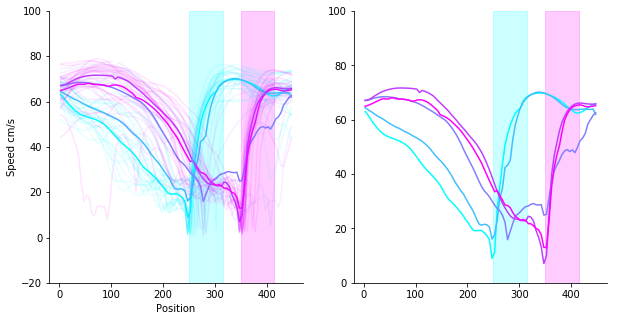

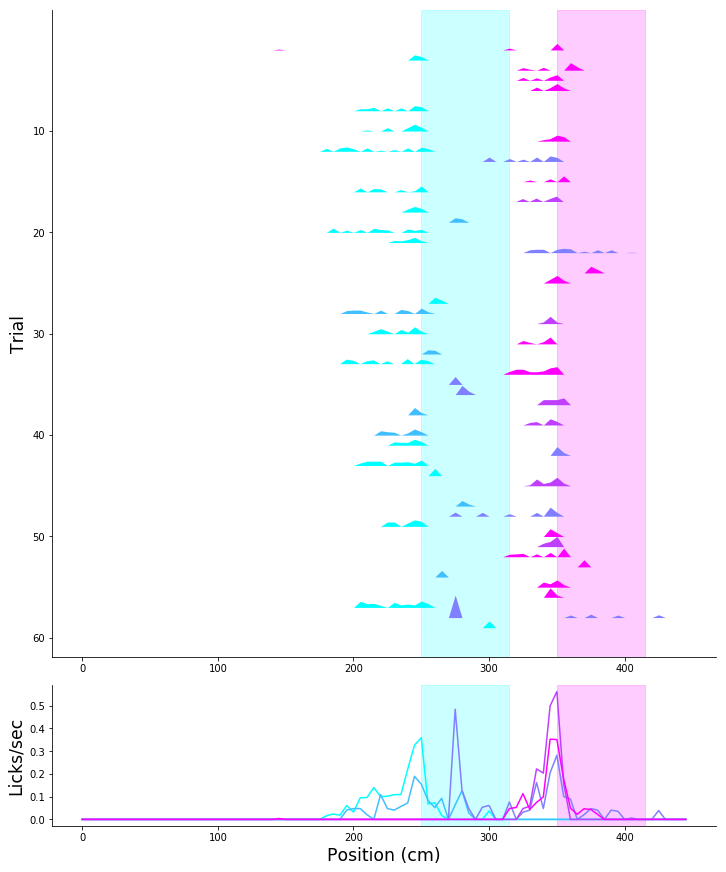

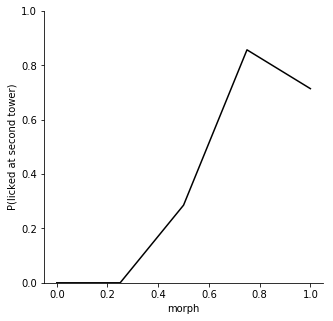

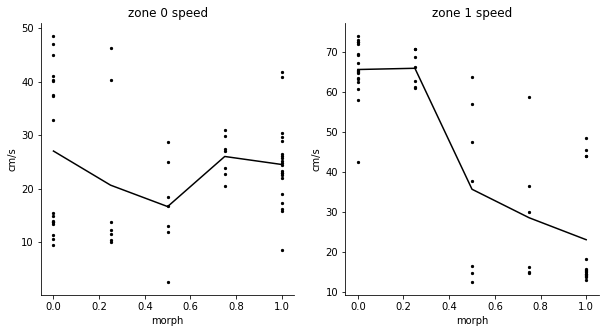

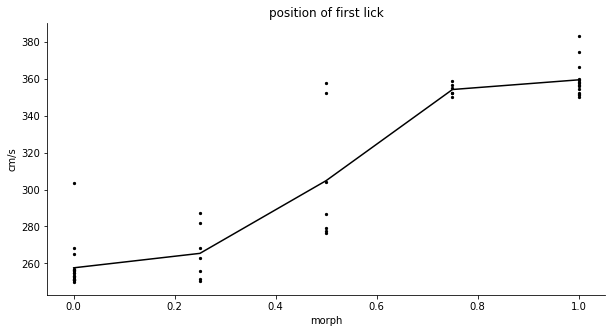

In [88]:
trial_mat, bin_edges, bin_centers = make_pos_bin_trial_matrices(data_TO[['speed','morph','lick rate','reward','lick']]._values,
                                              data_TO['pos']._values,
                                              data_TO['tstart']._values,
                                              data_TO['teleport']._values,bin_size=5)

morph_vec,count = sp.stats.mode(trial_mat[:,:,1],axis=1,nan_policy='omit')
morph_vec = np.squeeze(morph_vec)

 # speed vs position
speed_dict = trial_type_dict(trial_mat[:,:,0],morph_vec)

f,ax = plot_speed(bin_centers,speed_dict,morph_vec)
#f.suptitle("%s : %s : %s" % (mouse,sess['DateFolder'],sess['SessionNumber']))


# plot licking behavior 
lick_dict = trial_type_dict(trial_mat[:,:,4],morph_vec)
lick_mat = np.squeeze(trial_mat[:,:,2])
lick_mat_norm = lick_dict['all']/np.amax(lick_dict['all'])
lick_norm_dict = trial_type_dict(lick_mat_norm,morph_vec)
fig,axes = lick_plot(lick_dict,bin_edges,smooth=False,ratio=False)


trial_info = by_trial_info(data_TO)
pcnt_mean = avg_by_morph(trial_info['morphs'],trial_info['pcnt'])
f,ax = plt.subplots(figsize=[5,5])
# morph_vals = np.arange(0,1.25,.25)
ax.plot(np.sort(np.unique(morph_vec)),pcnt_mean,color='black')
#ax.plot(morph_vals,pcnt_mean_post,color='red')
ax.set_ylabel("P(licked at second tower)")
ax.set_xlabel("morph")
ax.set_ylim([0,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# zone speeds
zone0_speed = avg_by_morph(trial_info['morphs'],trial_info['zone0_speed'])
zone1_speed = avg_by_morph(trial_info['morphs'],trial_info['zone1_speed'])
f,ax = plt.subplots(1,2,figsize=[10,5])
#morph_vals = np.arange(0,1.25,.25)
ax[0].plot(np.sort(np.unique(morph_vec)),zone0_speed,color='black')
ax[0].scatter(trial_info['morphs'],trial_info['zone0_speed'],color='black',s=5)
ax[0].set_ylabel("cm/s")
ax[0].set_xlabel("morph")
ax[0].set_title("zone 0 speed")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)


ax[1].plot(np.sort(np.unique(morph_vec)),zone1_speed,color='black')
ax[1].scatter(trial_info['morphs'],trial_info['zone1_speed'],color='black',s=5)
ax[1].set_ylabel("cm/s")
ax[1].set_xlabel("morph")
ax[1].set_title("zone 1 speed")
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

#position of first lick
pos_lick = avg_by_morph(trial_info['morphs'],trial_info['pos_lick'])
f,ax = plt.subplots(figsize=[10,5])
ax.plot(np.sort(np.unique(morph_vec)),pos_lick,color='black')
ax.scatter(trial_info['morphs'],trial_info['pos_lick'],color='black',s=5)
ax.set_ylabel("cm/s")
ax.set_xlabel("morph")
ax.set_title("position of first lick")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [122]:
# load calcium data
info = loadmat_sbx(sess['scanmat'])['info']
ca_dat = load_ca_mat(sess['scanfile'])

C = ca_dat['C_dec'][info['frame'][0]:info['frame'][-1]+1]
S = ca_dat['S_dec'][info['frame'][0]:info['frame'][-1]+1]

frame_diff = data_TO.shape[0]-C.shape[0]
if frame_diff>0:
    data_TO = data_TO.iloc[:-frame_diff]
    
    
C_z = sp.stats.zscore(C,axis=0)
S_z = sp.stats.zscore(S,axis=0)
S_z_smooth = gaussian_filter1d(S_z,3,axis=0)
S_smooth = gaussian_filter1d(S,3,axis=0)

G:\My Drive\2P_Data\TwoTower\4139190.3\14_07_2018\TwoTower_Timeout\TwoTower_Timeout_017_016.mat
#subsystem#not made into numpy array


In [123]:
print(C.shape)
print(data_TO.shape)
print(info['frame'][0],info['frame'][-1])
print(info['frame'][-1]+1-info['frame'][0])
print(ca_dat['C_dec'][info['frame'][0]:].shape)

a = [1, 2,3]
print(a[:-1])

(15896, 704)
(15896, 16)
133 16029
15897
(15896, 704)
[1, 2]


(15896, 704)


Text(0,0.5,'PC 4')

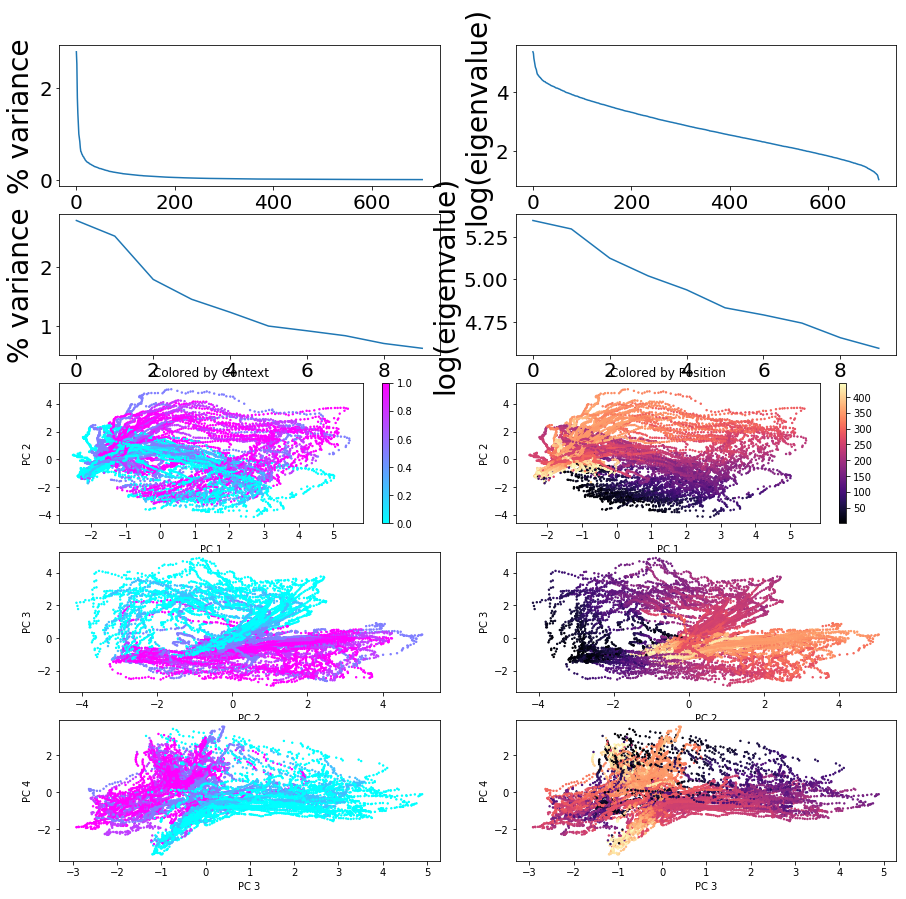

In [127]:
#PCA - do svd and look at both projections
#np.linalg.svd

pca = PCA()
trialMask = (data_TO['pos']>0) & (data_TO['pos']<445)
X = pca.fit_transform(C)

print(X.shape)
# skree plots
f,axarr = plt.subplots(5,2,figsize=[15,15])
axarr[0,0].plot(pca.explained_variance_)
axarr[0,0].set_ylabel("% variance",size=28)
axarr[0,0].tick_params(labelsize=20)

axarr[0,1].plot(np.log(pca.singular_values_))
axarr[0,1].set_ylabel("log(eigenvalue)",size=28)
axarr[0,1].tick_params(labelsize=20)

axarr[1,0].plot(pca.explained_variance_[:10])
axarr[1,0].set_ylabel("% variance",size=28)
axarr[1,0].tick_params(labelsize=20)


axarr[1,1].plot(np.log(pca.singular_values_[:10]))
axarr[1,1].set_ylabel("log(eigenvalue)",size=28)
axarr[1,1].tick_params(labelsize=20)




s_cxt=axarr[2,0].scatter(X[trialMask[:X.shape[0]],0],X[trialMask[:X.shape[0]],1],
                           c=data_TO.loc[trialMask,'morph']._values,cmap='cool',s=2)
plt.colorbar(s_cxt,ax=axarr[2,0])
axarr[2,0].set_title('Colored by Context')
axarr[2,0].set_xlabel("PC 1")
axarr[2,0].set_ylabel("PC 2")


s_pos=axarr[2,1].scatter(X[trialMask,0],X[trialMask,1],c=data_TO.loc[trialMask,'pos'],cmap='magma',s=2)
plt.colorbar(s_pos,ax=axarr[2,1])
axarr[2,1].set_title('Colored by Position')
axarr[2,1].set_xlabel("PC 1")
axarr[2,1].set_ylabel("PC 2")


s_cxt=axarr[3,0].scatter(X[trialMask,1],X[trialMask,2],c=data_TO.loc[trialMask,'morph'],cmap='cool',s=2)
axarr[3,0].set_xlabel("PC 2")
axarr[3,0].set_ylabel("PC 3")

s_cxt=axarr[3,1].scatter(X[trialMask,1],X[trialMask,2],c=data_TO.loc[trialMask,'pos'],cmap='magma',s=2)
axarr[3,1].set_xlabel("PC 2")
axarr[3,1].set_ylabel("PC 3")


s_cxt=axarr[4,0].scatter(X[trialMask,2],X[trialMask,3],c=data_TO.loc[trialMask,'morph'],cmap='cool',s=2)
axarr[4,0].set_xlabel("PC 3")
axarr[4,0].set_ylabel("PC 4")

s_cxt=axarr[4,1].scatter(X[trialMask,2],X[trialMask,3],c=data_TO.loc[trialMask,'pos'],cmap='magma',s=2)
axarr[4,1].set_xlabel("PC 3")
axarr[4,1].set_ylabel("PC 4")

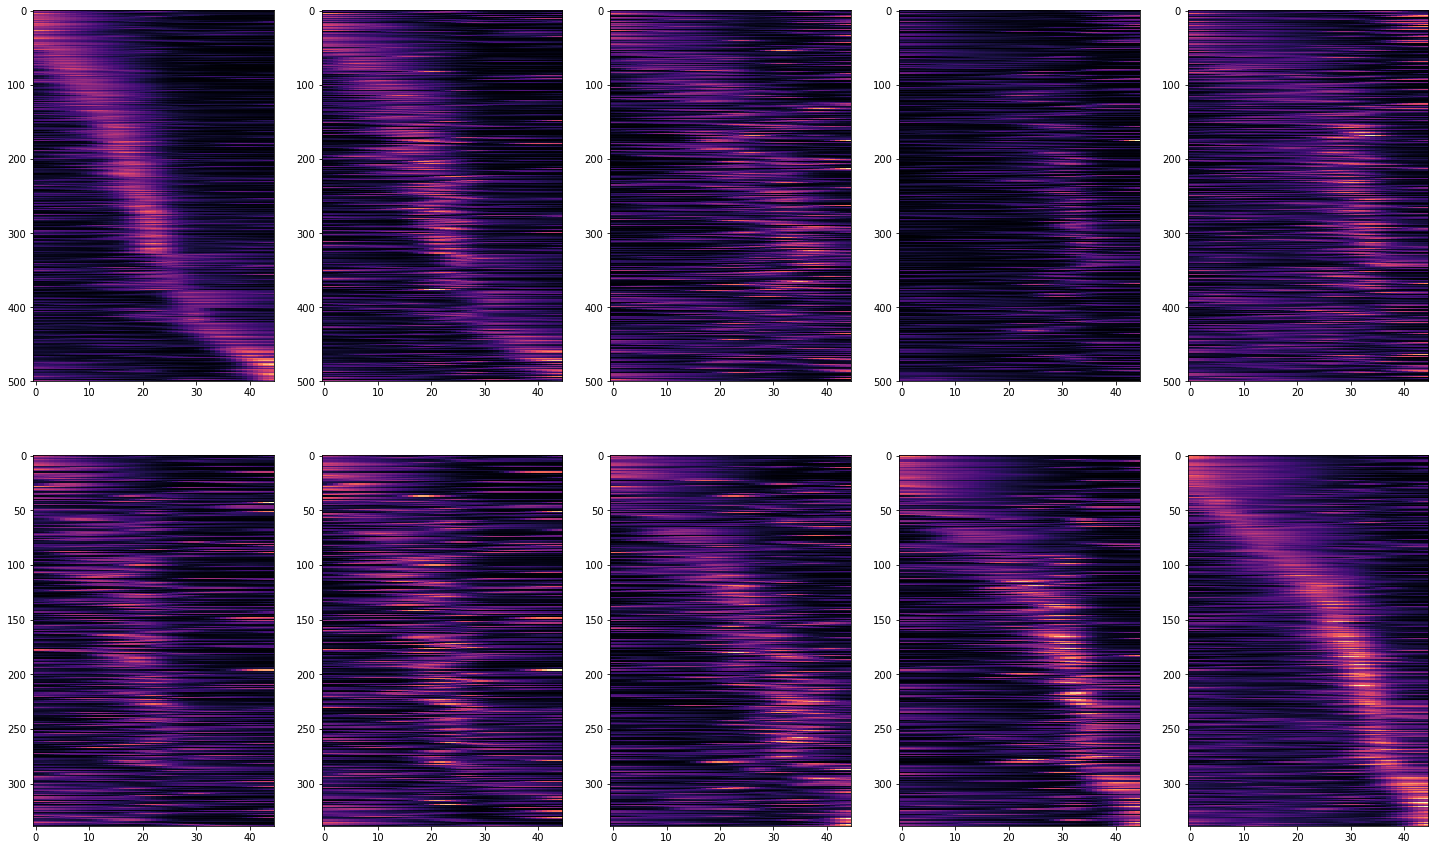

In [93]:
# place cells

morphs = np.sort(np.unique(data_TO['morph']._values))
f,ax = plt.subplots(2,int(morphs.shape[0]),figsize=[5*int(morphs.shape[0]),15])


mask0 = data_TO['morph']==0
frmap0, occupancy0 = rate_map(C[mask0,:],data_TO.loc[mask0,'pos'])
si0 = spatial_info(frmap0,occupancy0)
p0 = spatial_info_perm_test(si0,C[mask0,:],data_TO.loc[mask0,'pos'],nperms = 100)
maxInds0 = np.argmax(frmap0,axis=0)
p0_mask = np.argsort(maxInds0)
p0_mask = p0_mask[p0>.95]
#ax[0,0].imshow(frmap0[:,p0_mask].T,aspect='auto')

mask1 = data_TO['morph']==1
frmap1, occupancy1 = rate_map(C[mask1,:],data_TO.loc[mask1,'pos'])
si1 = spatial_info(frmap1,occupancy1)
p1 = spatial_info_perm_test(si1,C[mask1,:],data_TO.loc[mask1,'pos'],nperms = 100)
maxInds1 = np.argmax(frmap1,axis=0)
p1_mask = np.argsort(maxInds1)
p1_mask = p1_mask[p1>.95]
#ax[1,-1].imshow(frmap1[:,p1_mask].T,aspect='auto')
#ax[1,0].imshow(frmap1[:,p0_mask].T,aspect='auto')

fr_dict ={}
for i, m in enumerate(morphs):
    mask = data_TO['morph']==m
    frmap, occ = rate_map(C[mask,:],data_TO.loc[mask,'pos'])
    frmap_norm = np.copy(frmap)
    for j in range(frmap.shape[1]):
        frmap_norm[:,j]= gaussian_filter1d(frmap[:,j],2)/frmap[:,j].sum()
    fr_dict[m] = frmap/np.linalg.norm(frmap,ord='fro')
    
    fr_0 = frmap_norm[:,p0_mask]
    fr_0_norm = np.copy(fr_0)
    #for j in range(fr_0.shape[1]):
    #    fr_0_norm[:,j] = gaussian_filter1d(fr_0[:,j],2)/fr_0[:,j].sum()
        
    ax[0,i].imshow(fr_0_norm.T,aspect='auto',cmap='magma')#


    fr_1 = frmap_norm[:,p1_mask]
    fr_1_norm = np.copy(fr_1)
    #for j in range(fr_1.shape[1]):
    #    fr_1_norm[:,j] = gaussian_filter1d(fr_1[:,j],2)/fr_1[:,j].sum()
        
    ax[1,i].imshow(fr_1_norm.T,aspect='auto',cmap='magma')
    

#try restricting to correct trials only





# pop vector correlation

(0, 1)

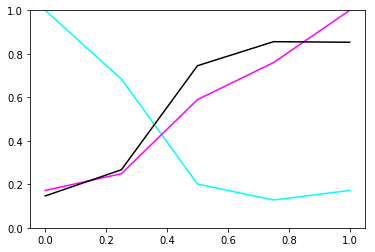

In [94]:
r0,r1 =np.zeros(morphs.shape),np.zeros(morphs.shape)
for i,m in enumerate(fr_dict.keys()):
    
    r0_i, r1_i = 0, 0
    for n in range(fr_dict[0].shape[0]):
        rt,pt = sp.stats.pearsonr(fr_dict[m][n,:],fr_dict[0][n,:])
        r0_i += rt
        
        rt,pt = sp.stats.pearsonr(fr_dict[m][n,:],fr_dict[1][n,:])
        r1_i+=rt
        
    r0[i],r1[i]=r0_i/(n+1), r1_i/(n+1)
        
    
f,ax = plt.subplots()
ax.plot(morphs,r0,color=plt.cm.cool(0.))
ax.plot(morphs,r1,color=plt.cm.cool(1.))
ax.plot(morphs,np.divide(r1,r0+r1),color='black')

ax.set_ylim([0,1])

(0, 1)

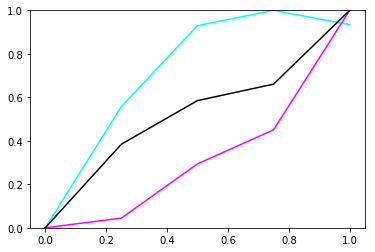

In [95]:
d0,d1 =np.zeros(morphs.shape),np.zeros(morphs.shape)
for i,m in enumerate(fr_dict.keys()):
    
    d0[i]=np.linalg.norm(fr_dict[m]-fr_dict[0],ord='fro')
    d1[i]=np.linalg.norm(fr_dict[m]-fr_dict[1],ord='fro')
   
d_rat = np.divide(d0,d0+d1)
    
f,ax = plt.subplots()
ax.plot(morphs,d0/d0.max(),color=plt.cm.cool(0.))
ax.plot(morphs,np.abs(1-d1/d1.max()),color=plt.cm.cool(1.))
ax.plot(morphs,d_rat,color='black')
ax.set_ylim([0,1])

(45, 704)
(45, 704)
(45, 704)
(45, 704)


C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(45, 704)
(704, 225)
[]
(100, 45, 789)
dict_keys(['all', 'labels', 'indices', 0.0, 0.25, 0.5, 0.75, 1.0])
(14, 45, 789)


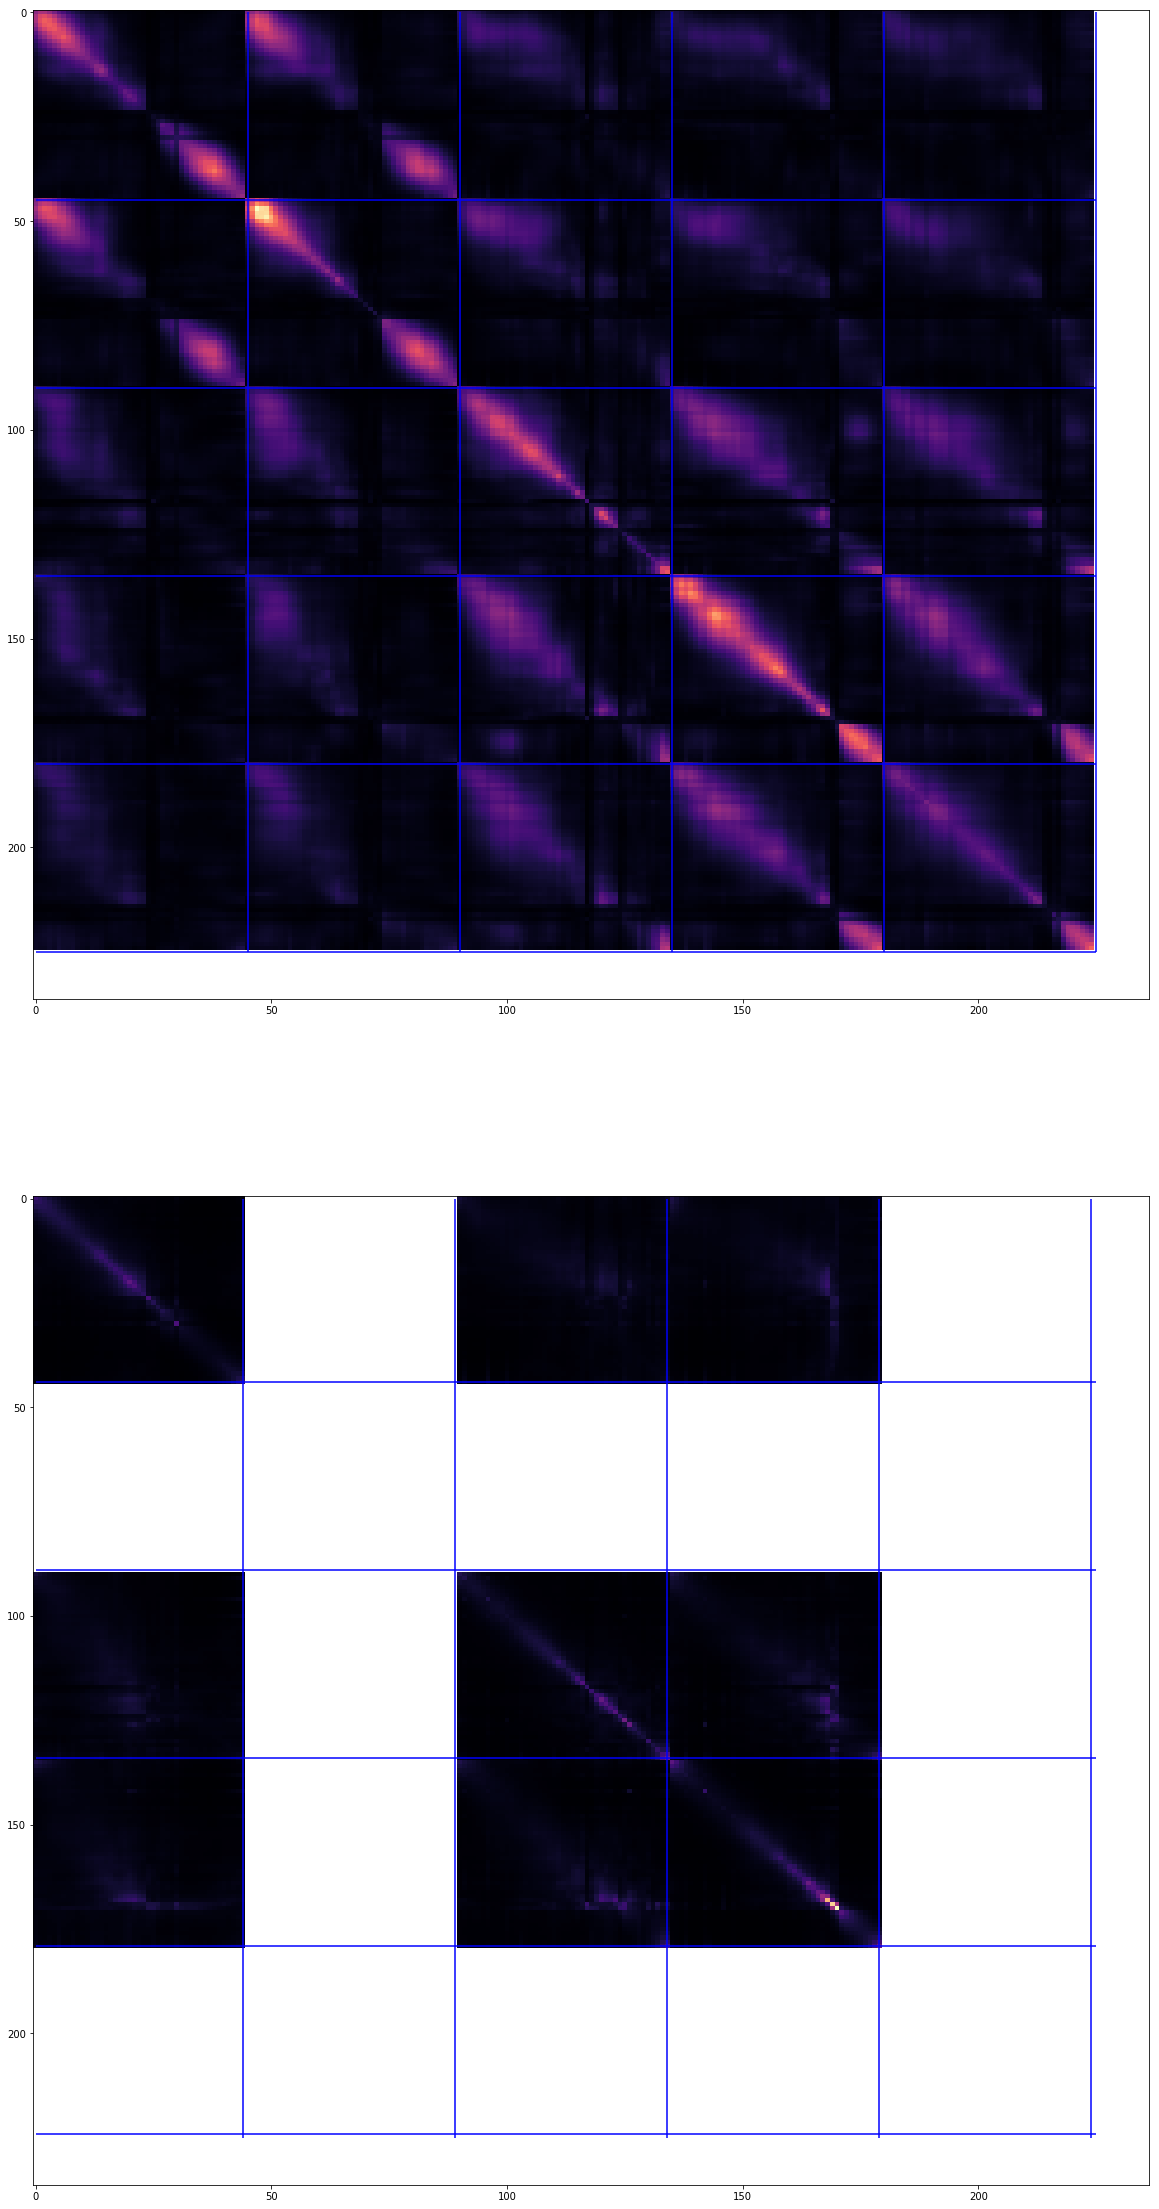

In [121]:
# similarity matrices


# for each unique morph value

j = 0
for i,m in enumerate(morphs):
    mask = data_TO['morph']==m
    frmap, occ = rate_map(S_smooth[mask,:],data_TO.loc[mask,'pos'])
    frmap_norm = np.zeros(frmap.shape)
    print(frmap_norm.shape)
    for j in range(frmap.shape[1]):
        frmap_norm[:,j] = frmap[:,j]/frmap[:,j].sum()
    if i == 0:
        X = frmap.T
        X_norm = frmap_norm.T
    else:
        X = np.hstack((X,frmap.T))
        X_norm = np.hstack((X_norm,frmap_norm.T))
        


# calculate rate map
f,ax = plt.subplots(2,1, figsize=[20,40])
# add to array


ax[0].imshow(np.matmul(X.T,X),aspect='auto',cmap='magma')
ax[0].vlines(np.arange(45,250,45),0,225,color='blue')
ax[0].hlines(np.arange(45,250,45),0,225,color='blue')

ax[1].imshow(np.matmul(X_norm.T,X_norm),aspect='auto',cmap='magma')
ax[1].vlines(np.arange(44,250,45),0,225,color='blue')
ax[1].hlines(np.arange(44,250,45),0,225,color='blue')
# calculate inner products


# plot


print(X.shape)
print(np.where(X.sum(axis=0)==0)[0])
print(nrn_trial_mat.shape)
print(rate_map_dict.keys())
print(rate_map_dict[.25].shape)

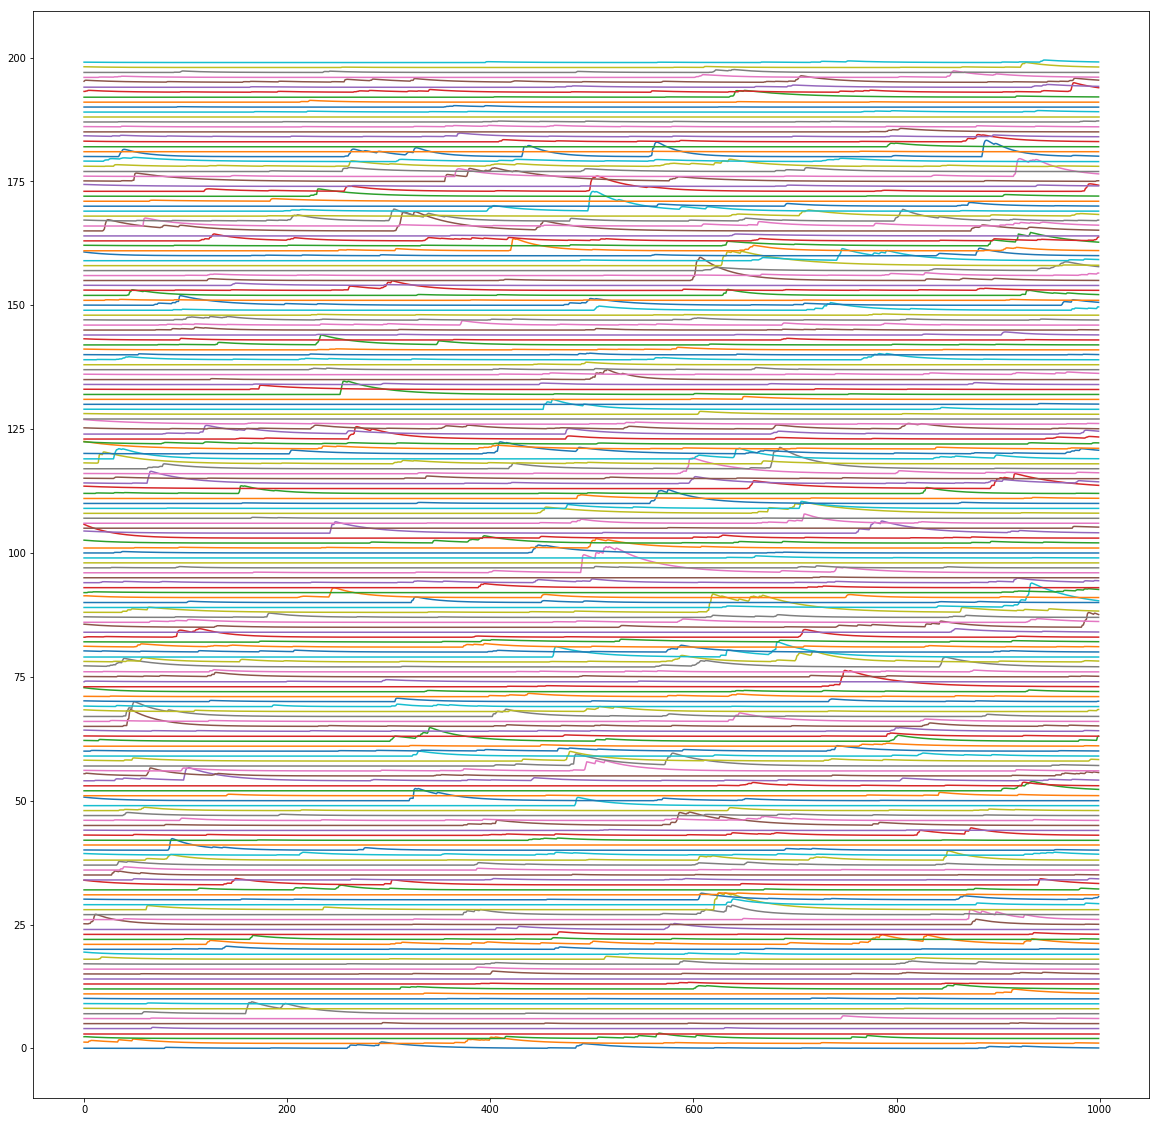

In [118]:
f,ax = plt.subplots(figsize=[20,20])
offset = np.zeros([1000,200])
for i in range(200):
    offset[:,i]= i
t=ax.plot(C[:1000,:200]+ offset)

In [118]:
# LDA



# fit on correct trials



In [ ]:
# place x context decoding

#train without morphs, test on morphs

In [19]:
print(sess['scanfile'])

G:\My Drive\2P_Data\TwoTower\4139190.3\19_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000_cnmf_results_pre.mat
